# Data Comparison

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [87]:
from eval import *
# from utils import *
import pandas as pd
import numpy as np

In [162]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

In [3]:
from sklearn.preprocessing import MinMaxScaler

def plot_em_all(real, fake):
    if not isinstance(fake, list):
        fake = [fake]
    for x in fake:
        if isinstance(x, dict):
            for key, value in x.items():
                plot_corr_diff(real[key], fake[key], plot_diff=True)
                plt.show()
        else:
            assert isinstance(x, pd.DataFrame)
            plot_corr_diff(real, x, plot_diff=True)
            plt.show()

def plot_stats(real, fakes, is_dict=False, which='cat'):
    if not isinstance(fakes, list):
        fakes = [fakes]
    
    for fake in fakes:
        if is_dict:
            real_df, fake_df = real[which], fake[which]
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        real_num_mean = np.log10(np.add(real_df.mean().values, 1e-5))
        fake_num_mean = np.log10(np.add(fake_df.mean().values, 1e-5))
        sns.scatterplot(x=real_num_mean, 
                        y=fake_num_mean, 
                        ax=ax[0])
        line = np.arange(min(real_num_mean + [-5]), max(real_num_mean + [10]))
        sns.lineplot(x=line, y=line, ax=ax[0])
        ax[0].set_title('Means of real and fake data')
        ax[0].set_xlabel('real data mean (log)')
        ax[0].set_ylabel('fake data mean (log)')

        real_cat_std = np.log10(np.add(real_df.std().values, 1e-5))
        fake_cat_std = np.log10(np.add(fake_df.std().values, 1e-5))
        line = np.arange(min(real_cat_std + [-5]), max(real_cat_std + [10]))
        sns.scatterplot(x=real_cat_std, 
                        y=fake_cat_std, 
                        ax=ax[1])
        sns.lineplot(x=line, y=line, ax=ax[1])
        ax[1].set_title('Stds of real and fake data')
        ax[1].set_xlabel('real data std (log)')
        ax[1].set_ylabel('fake data std (log)')
        plt.show()


# Berka

## Original TGAN

In [ ]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan.csv')
tgan_org_evaluator = DataEvaluator(real, fake)

In [ ]:
tgan_org_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [57]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-wgan-gp.csv')
wgan_evaluator = DataEvaluator(real, fake)

In [ ]:
wgan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [60]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-skip-connections.csv')
skip_evaluator = DataEvaluator(real, fake)

In [ ]:
skip_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [63]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_medgan_100.csv')
medgan_evaluator = DataEvaluator(real, fake)

In [ ]:
medgan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [64]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_tablegan_100.csv')
tablegan_evaluator = DataEvaluator(real, fake)

In [ ]:
tablegan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [24]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[3.15558081e-03 2.25478515e-03 1.00895154e-02 1.60792182e-03 3.68700434e-03 0.00000000e+00 4.03186594e-05 0.00000000e+00 0.00000000e+00 3.42898353e-05 2.31575622e-04 0.00000000e+00 6.94454588e-04 2.26483782e-02
 1.71159461e-03 2.68261433e-03 5.46665979e-01 2.46056113e-03 4.02035426e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[ 5  7  8 11  9  6 10 12  3 14  1 17 15  0  

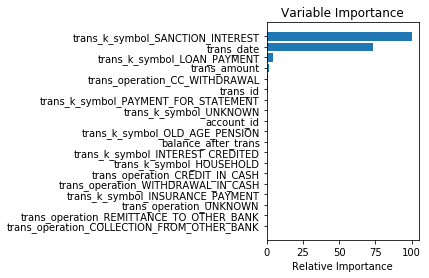

In [26]:
feature_importance = tgan_org_evaluator.f_classifiers[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

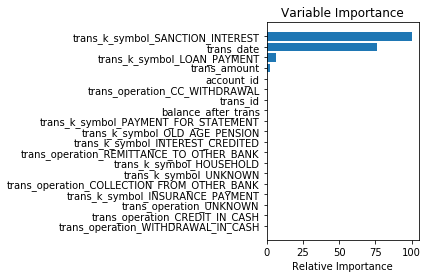

In [27]:
feature_importance = tgan_org_evaluator.r_classifiers[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Creditcard

## Original TGAN

In [93]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan.csv', fake_sep=';')
tgan_org_evaluator = DataEvaluator(real, fake)

In [ ]:
tgan_org_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [92]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-wgan-gp.csv', fake_sep=';')
wgan_evaluator = DataEvaluator(real, fake)

In [ ]:
wgan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [90]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/creditcard_sample_tgan-skip-connections.csv', fake_sep=';')
skip_evaluator = DataEvaluator(real, fake)

In [ ]:
skip_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [88]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_medgan_100.csv', fake_sep=';')
medgan_evaluator = DataEvaluator(real, fake)

In [ ]:
medgan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [95]:
real, fake = get_data('../data/creditcard/creditcard_num.csv', '../final_data/creditcard/sample_creditcard_tablegan_100.csv', fake_sep=';')
tablegan_evaluator = DataEvaluator(real, fake)

In [ ]:
tablegan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [24]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[3.15558081e-03 2.25478515e-03 1.00895154e-02 1.60792182e-03 3.68700434e-03 0.00000000e+00 4.03186594e-05 0.00000000e+00 0.00000000e+00 3.42898353e-05 2.31575622e-04 0.00000000e+00 6.94454588e-04 2.26483782e-02
 1.71159461e-03 2.68261433e-03 5.46665979e-01 2.46056113e-03 4.02035426e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[ 5  7  8 11  9  6 10 12  3 14  1 17 15  0  

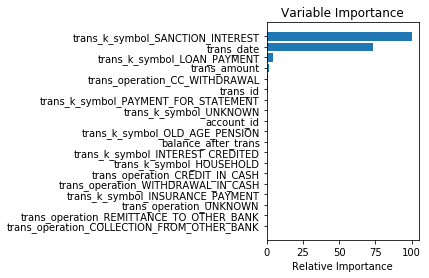

In [26]:
feature_importance = tgan_org_evaluator.f_classifiers[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

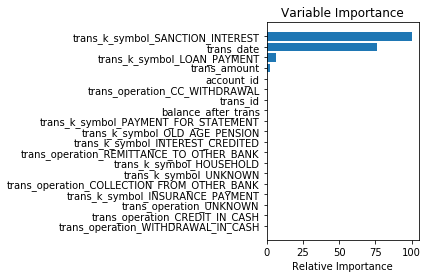

In [27]:
feature_importance = tgan_org_evaluator.r_classifiers[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Census

## Original TGAN

In [173]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan.csv', real_sep=',')
tgan_org_evaluator = DataEvaluator(real, fake)

In [ ]:
tgan_org_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [172]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-wgan-gp.csv', real_sep=',')
wgan_evaluator = DataEvaluator(real, fake)

In [ ]:
wgan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [171]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-skip-connections-columns-corrected.csv', real_sep=',', fake_sep=';')
skip_evaluator = DataEvaluator(real, fake)

In [ ]:
skip_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [163]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_medgan_100.csv', real_sep=',')
medgan_evaluator = DataEvaluator(real, fake)

In [ ]:
medgan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [167]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_tablegan_100.csv', real_sep=',')
tablegan_evaluator = DataEvaluator(real, fake)

In [ ]:
tablegan_evaluator.evaluate(target_col='trans_type', verbose=True)

In [ ]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [24]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[3.15558081e-03 2.25478515e-03 1.00895154e-02 1.60792182e-03 3.68700434e-03 0.00000000e+00 4.03186594e-05 0.00000000e+00 0.00000000e+00 3.42898353e-05 2.31575622e-04 0.00000000e+00 6.94454588e-04 2.26483782e-02
 1.71159461e-03 2.68261433e-03 5.46665979e-01 2.46056113e-03 4.02035426e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[ 5  7  8 11  9  6 10 12  3 14  1 17 15  0  

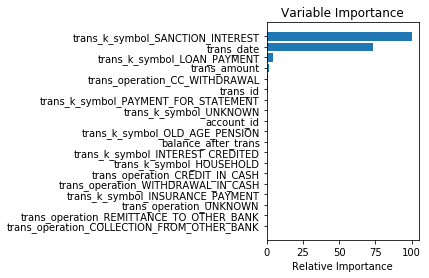

In [26]:
feature_importance = tgan_org_evaluator.f_classifiers[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

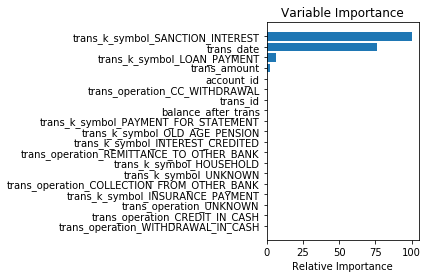

In [27]:
feature_importance = tgan_org_evaluator.r_classifiers[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()